<center><h1>Graph</h1></center>
<hr/>

#### Imports

In [1]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#### Data

In [2]:
story = "\n".join(pd.read_table("../data/our_data/Cinderella.txt", header=None)[0])

In [3]:
ann = json.load(open("../data/our_data/Cinderella.json"))

In [4]:
G = nx.MultiGraph(name="Cinderella")

In [5]:
ann

{'Characters': ['cinderella',
  'stepmother',
  'sisters',
  'godmother',
  'prince',
  'king',
  'queen'],
 'Relationships': {'cinderella': [['stepmother', -1],
   ['sisters', -1],
   ['godmother', 1],
   ['prince', 1]],
  'stepmother': [['cinderella', -1], ['sisters', 1]],
  'sisters': [['cinderella', -1], ['stepmother', 1]],
  'godmother': [['cinderella', 1]],
  'prince': [['cinderella', 1]],
  'king': [['cinderella', 1], ['queen', 0]],
  'queen': [['king', 0]]},
 'Protagonist': 'cinderella',
 'Antagonist': ''}

In [6]:
def knowledge_graph(info: dict, name:str = 'Knowdlege Graph', save:bool = False):
    # info is dictionary with 'Characters' and 'Relationships'
    
    color_map= {-1: 'red', 0: 'gray', 1: 'green'}    
    G = nx.MultiGraph(name=name)

    for character in info['Characters']:
        G.add_node(character)

    for character1, characters in info['Relationships'].items():
        for character2, relationship in characters:
            G.add_edge(character1, character2, value = relationship)

    edge_colors = [color_map[rel['value']] for ch1, ch2, rel in G.edges(data=True)]
    node_sizes  = [(v+1) * 500 for v in dict(G.degree()).values()]
    
    plt.figure(figsize=(10, 7))
    nx.draw_circular(G, edge_color=edge_colors, node_size=node_sizes, with_labels=True, width=1.5, font_size=10)

    plt.savefig(name+'.jpg') if save else None
    plt.axis('off')
    plt.show()

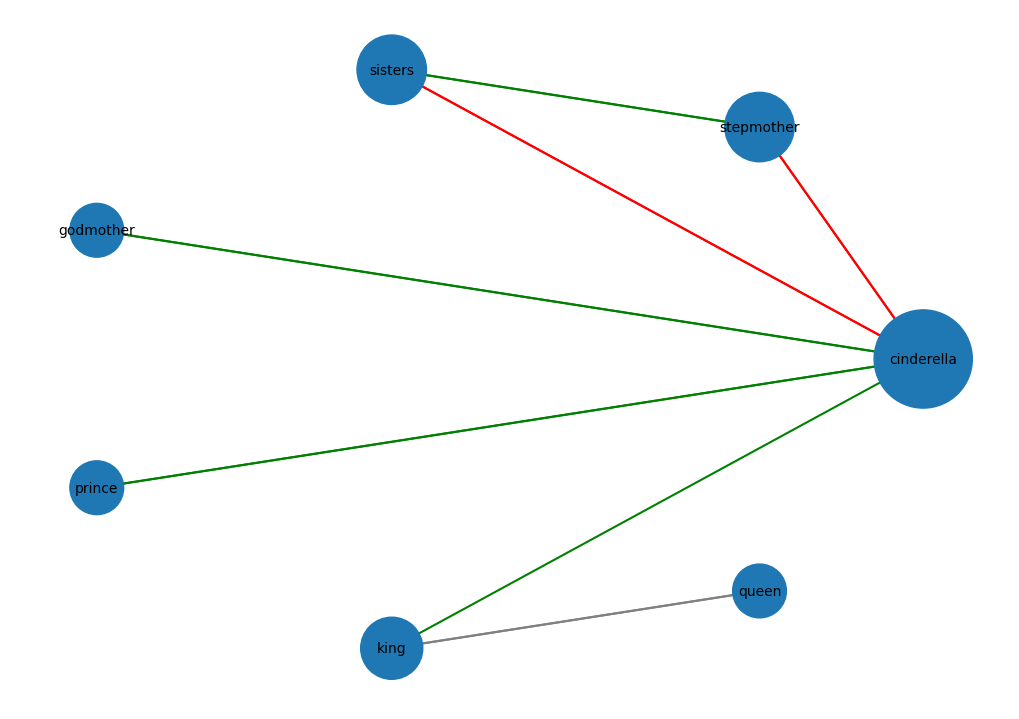

In [7]:
knowledge_graph(ann)